In [9]:
import numpy as np 
import os
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd


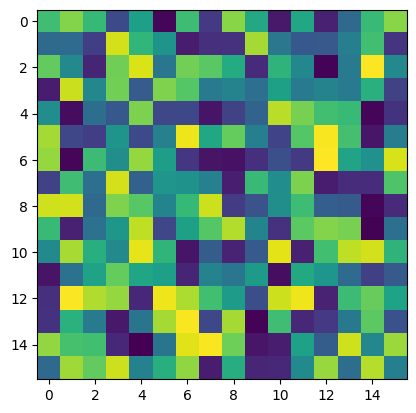

In [10]:
a = np.random.randint(0,255,(50,16,16))
#a.reshape((50,16,16))
plt.imshow(a[0])

In [11]:
folderpath = 'data/'
n_mod = 3
n_patients = 20
n_tiles_per_patient = 100
tilesize = 256
for i in range(n_mod):
    path = folderpath + f"modality_{i}"
    if not os.path.exists(path):
        os.mkdir(path)
rows = [] 
for patient in range(n_patients):
    for idx in range(n_tiles_per_patient):
        label = 0 if patient%2  else 1 
        sett = "TRAIN" if patient<int(0.7*n_patients) else "TEST" if patient<int(0.9*n_patients) else "VALIDATION"
        row = [f"pid{patient}",label,sett]
        for mod in range(n_mod):
            path = folderpath + f"modality_{mod}" 
            path += f"/pid{patient}_mod{mod}_{idx}.jpg"
            
            row.append(path)
            #rand_image = np.random.randint(0,255,(tilesize,tilesize))
            #matplotlib.image.imsave(path, rand_image)
        rows.append(row)




In [12]:
df = pd.DataFrame(rows)
columns = ["Patient_ID","Label","Set"]
columns+= [ f"Modality{i}_Path" for i in range(len(df.keys().tolist())-3) ]
columns
df.columns = columns
df

,Patient_ID,Label,Set,Modality0_Path,Modality1_Path,Modality2_Path
0,pid0,1,TRAIN,data/modality_0/pid0_mod0_0.jpg,data/modality_1/pid0_mod1_0.jpg,data/modality_2/pid0_mod2_0.jpg
1,pid0,1,TRAIN,data/modality_0/pid0_mod0_1.jpg,data/modality_1/pid0_mod1_1.jpg,data/modality_2/pid0_mod2_1.jpg
2,pid0,1,TRAIN,data/modality_0/pid0_mod0_2.jpg,data/modality_1/pid0_mod1_2.jpg,data/modality_2/pid0_mod2_2.jpg
3,pid0,1,TRAIN,data/modality_0/pid0_mod0_3.jpg,data/modality_1/pid0_mod1_3.jpg,data/modality_2/pid0_mod2_3.jpg
4,pid0,1,TRAIN,data/modality_0/pid0_mod0_4.jpg,data/modality_1/pid0_mod1_4.jpg,data/modality_2/pid0_mod2_4.jpg
...,...,...,...,...,...,...
1995,pid19,0,VALIDATION,data/modality_0/pid19_mod0_95.jpg,data/modality_1/pid19_mod1_95.jpg,data/modality_2/pid19_mod2_95.jpg
1996,pid19,0,VALIDATION,data/modality_0/pid19_mod0_96.jpg,data/modality_1/pid19_mod1_96.jpg,data/modality_2/pid19_mod2_96.jpg
1997,pid19,0,VALIDATION,data/modality_0/pid19_mod0_97.jpg,data/modality_1/pid19_mod1_97.jpg,data/modality_2/pid19_mod2_97.jpg
1998,pid19,0,VALIDATION,data/modality_0/pid19_mod0_98.jpg,data/modality_1/pid19_mod1_98.jpg,data/modality_2/pid19_mod2_98.jpg


In [14]:
df.to_csv("new.csv",index=False)